<a href="https://colab.research.google.com/github/veeannzhang/Capstone_Microsoft-/blob/master/Capstone_(with_features_OHE)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import warnings
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt 
import matplotlib
warnings.filterwarnings("ignore")

## 1. Import Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving survey_total.csv to survey_total.csv


In [0]:
# Load the dataset into a dataframe
survey_total = pd.read_csv("survey_total.csv")

In [5]:
# Examine the data
survey_total.head()

,Unnamed: 0,What day of the month were you born?,Will you vote in the Congressional elections 2018?,"Compared to previous Congressional elections, how enthusiastic are you about voting this year?","If the election for the U.S. House of Representatives in your district was today, who would you vote for?",How do you feel about the job the Republican candidate is doing as a member of congress?,"Is your opinion of the Democratic candidate favorable, unfavorable or haven't you heard enough about the candidate?","How do you feel about increased government spending and regulations addressing climate change, even if it reduced economic activity?",Which of these seven topics do you care about most?,Do you think rolling back clean air and water regulations will affect public health in general?,...,party,gender,age,race,education,urbanicity,district,married,dob,wave
0,1,08,Definitely,About the same/don't know,Republican candidate,Haven't heard enough,Somewhat favorable,Favor weakly,Healthcare reform,Yes,...,Dem,Female,18 - 24,Hispanic,No Bachelors,U5,CA-10,Unmarried,08,2018-09
1,2,8,Likely,About the same/don't know,Democratic candidate,Approve weakly,Somewhat favorable,Favor weakly,Tax reform,No,...,Dem,Male,45 - 54,White,No Bachelors,U5,CA-10,Married,8,2018-09
2,3,19,Likely,About the same/don't know,Democratic candidate,Disapprove strongly,Somewhat favorable,Favor weakly,Gun safety reform,Yes,...,Dem,Female,35 - 44,White,No Bachelors,S4,CA-10,Unmarried,19,2018-09
3,4,1,Likely,About the same/don't know,Other candidate,Approve strongly,Somewhat favorable,Favor strongly,Clean air and water protection,Yes,...,Rep,Female,25 - 34,Hispanic,No Bachelors,S4,CA-10,Married,1,2018-09
4,5,21,Likely,More enthusiastic,Republican candidate,Approve strongly,Haven't heard enough,Oppose strongly,Healthcare reform,No,...,Ind,Male,35 - 44,White,Bachelors,U5,CA-10,Unmarried,21,2018-09


In [6]:
# Examine column names
print(survey_total.columns)

Index(['Unnamed: 0', 'What day of the month were you born?',
       'Will you vote in the Congressional elections 2018?',
       'Compared to previous Congressional elections, how enthusiastic are you about voting this year?',
       'If the election for the U.S. House of Representatives in your district was today, who would you vote for?',
       'How do you feel about the job the Republican candidate is doing as a member of congress?',
       'Is your opinion of the Democratic candidate favorable, unfavorable or haven't you heard enough about the candidate?',
       'How do you feel about increased government spending and regulations addressing climate change, even if it reduced economic activity?',
       'Which of these seven topics do you care about most?',
       'Do you think rolling back clean air and water regulations will affect public health in general?',
       'How concerned are you that rolling back clean air and water regulations will affect your and your family's health

## 2. Choosing Features and Target

In [0]:
data = survey_total[['education','gender','age','race',
               'What is your political party affiliation?',
               'How do you feel about the job Donald Trump is doing as president?',
               'Which of these seven topics do you care about most?',
               'How do you feel about the job the Republican candidate is doing as a member of congress?',
               'Do you think the Republican candidate or the Democratic candidate would do a better job addressing the issue of public health?',
               'If the election for the U.S. House of Representatives in your district was today, who would you vote for?']]

# The last column in data would be our target.

In [0]:
#df['range'] = df['range'].str.replace(',','-')
data['age'] = data['age'].str.replace('>','-')
data['Which of these seven topics do you care about most?'] = data['Which of these seven topics do you care about most?'].str.replace('/','-')

In [9]:
len(data)

9153

### Drop rows with missing values

In [0]:
new_data = data.dropna(axis=0,how='any')

In [11]:
len(new_data)
    # 50 rows are dropped

9103

### Subsetting new_data into features and label

In [0]:
features = new_data.iloc[:,0:9]
y = new_data.iloc[:,9]

In [13]:
set(y)

{'Democratic candidate',
 'Other candidate',
 'Republican candidate',
 'Undecided'}

### Transform Categorical Data into Numerics using One Hot Encoding

In [0]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # Load One Hot Encoder
le = preprocessing.LabelEncoder() # Load Label Encoder

In [0]:
for i in range(9): 
    features.iloc[:,i] = le.fit_transform(features.iloc[:,i])

In [0]:
X = [None] * 9
for i in range(9):
    X[i] = pd.DataFrame(enc.fit_transform(features.iloc[:,i].values.reshape(-1,1)).toarray())

#### **Rename all columns to fit the one-hot-encoded features

In [0]:
X[0] = X[0].rename(index = str, columns = {0:"education_Bachelors", 1:"education_No Bachelors"})
X[1] = X[1].rename(index = str, columns = {0:"gender_Female", 1:"gender_Male"})
X[2] = X[2].rename(index = str, columns = {0:"age_>54", 1:"age_18-24", 2:"age_25-34", 3:"age_35-44", 4:"age_45-54"})
X[3] = X[3].rename(index = str, columns = {0:"race_Black", 1:"race_Hispanic", 2:"race_Other Race", 3:"White"})
X[4] = X[4].rename(index = str, columns = {0:"Q1_Independent", 1:"Q1_Lean Democrat/Independent", 2:"Q1_Lean Republican/Independent",
                                         3:"Q1_Strong Democrat", 4:"Q1_Strong Republican", 5:"Q1_Weak Democrat", 
                                            6:"Q1_Weak Republican"})
X[5] = X[5].rename(index = str, columns = {0:"Q2_Approve Strongly", 1:"Q2_Approve Weakly", 2:"Q2_Disapprove Strongly",
                                            3:"Q2_Disapprove Weakly", 4:"Q2_Neither Approve nor Disapprove"})
X[6] = X[6].rename(index = str, columns = {0:"Q3_Clean air and water protection", 1:"Q3_Corruption in politics", 
                                            2:"Q3_Foreign policy", 3:"Q3_Gun safety reform", 4:"Q3_Healthcare reform",
                                            5:"Q3_Immigration reform", 6:"Q3_Tax reform"})
X[7] = X[7].rename(index = str, columns = {0:"Q4_Approve strongly", 1:"Q4_Approve weakly", 2:"Q4_Disapprove strongly", 
                                            3:"Q4_Disapprove weakly", 4:"Q4_Haven't heard enough"})
X[8] = X[8].rename(index = str, columns = {0:"Q5_Both equally/no opinion", 1:"Q5_Democratic candidate", 2:"Q5_Republican candidate"})

#### **Concatnate the one-hot-encoded features into a single data frame

In [0]:
X_ohe = pd.concat([X[0], X[1], X[2], X[3], X[4], X[5], X[6], X[7], X[8]], axis = 1)

#### **Examine the shape of the one-hot-encoded features

In [19]:
X_ohe.shape

(9103, 40)

In [20]:
X_ohe.columns

Index(['education_Bachelors', 'education_No Bachelors', 'gender_Female',
       'gender_Male', 'age_>54', 'age_18-24', 'age_25-34', 'age_35-44',
       'age_45-54', 'race_Black', 'race_Hispanic', 'race_Other Race', 'White',
       'Q1_Independent', 'Q1_Lean Democrat/Independent',
       'Q1_Lean Republican/Independent', 'Q1_Strong Democrat',
       'Q1_Strong Republican', 'Q1_Weak Democrat', 'Q1_Weak Republican',
       'Q2_Approve Strongly', 'Q2_Approve Weakly', 'Q2_Disapprove Strongly',
       'Q2_Disapprove Weakly', 'Q2_Neither Approve nor Disapprove',
       'Q3_Clean air and water protection', 'Q3_Corruption in politics',
       'Q3_Foreign policy', 'Q3_Gun safety reform', 'Q3_Healthcare reform',
       'Q3_Immigration reform', 'Q3_Tax reform', 'Q4_Approve strongly',
       'Q4_Approve weakly', 'Q4_Disapprove strongly', 'Q4_Disapprove weakly',
       'Q4_Haven't heard enough', 'Q5_Both equally/no opinion',
       'Q5_Democratic candidate', 'Q5_Republican candidate'],
      dtype='

### Transform y labels into numeric values

In [21]:
le_label = preprocessing.LabelEncoder()
le_label.fit(y)
y_le = le_label.transform(y)
list(le_label.classes_)

['Democratic candidate',
 'Other candidate',
 'Republican candidate',
 'Undecided']

### Simple random sampling for sample sizes 50, 100, 150, 200....

In [0]:
# Get the range of total population
c = list(range(0, len(new_data)))

# Initialize a list for train & test sets & a list to store their classifiers & a list of test score
X_ohe_train = [None] * 11
X_ohe_test = [None] * 11
y_le_train = [None] * 11
y_le_test = [None] * 11

# Split data into train and test set for each sample size and train models.
sample_size = list(range(100,1100,100))

for i in range(10):
    index = random.sample(c,sample_size[i])
    X_ohe_train[i], X_ohe_test[i], y_le_train[i], y_le_test[i] = train_test_split(X_ohe.iloc[index,:], y_le[index], 
                                                                              test_size=0.2, random_state=42)
X_ohe_train[10], X_ohe_test[10], y_le_train[10], y_le_test[10] = train_test_split(X_ohe, y_le, test_size = 0.2,
                                                                                  random_state = 42)

features_train = [None] * 11
features_test = [None] * 11
y_rf_train = [None] * 11
y_rf_test = [None] * 11
for i in range(10):
    index = random.sample(c, sample_size[i])
    features_train[i], features_test[i], y_rf_train[i], y_rf_test[i] = train_test_split(features.iloc[index,:],
                                                                                        y_le[index], test_size=0.2,
                                                                                        random_state = 42)
features_train[10], features_test[10], y_rf_train[10], y_rf_test[10] = train_test_split(features, y_le, test_size=0.2,
                                                                                        random_state=42)

In [0]:
RF_clf = [None] * 11
RF_scores = []
RF_CV_scores = []
importances = np.zeros((11,9,100))
for i in range(11):
    for j in range(100):
        RF_clf[i] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
        RF_clf[i].fit(features_train[i], y_rf_train[i])
        importances[i][:,j] = RF_clf[i].feature_importances_
        RF_scores.append(RF_clf[i].score(features_test[i], y_rf_test[i]))
        RF_CV_scores.append(np.mean(cross_val_score(RF_clf[i], features_train[i], y_rf_train[i], cv =10)))


In [0]:
importances_means = np.zeros((11, 9))
for i in range(11):
    importances_means[i,:] = np.mean(importances[i],axis = 1)

In [0]:
indices = np.zeros((11,9))
for i in range(11):
    indices[i,:] = np.argsort(importances_means[i,:])[::-1]
indices = indices.astype(int)

<Container object of 9 artists>

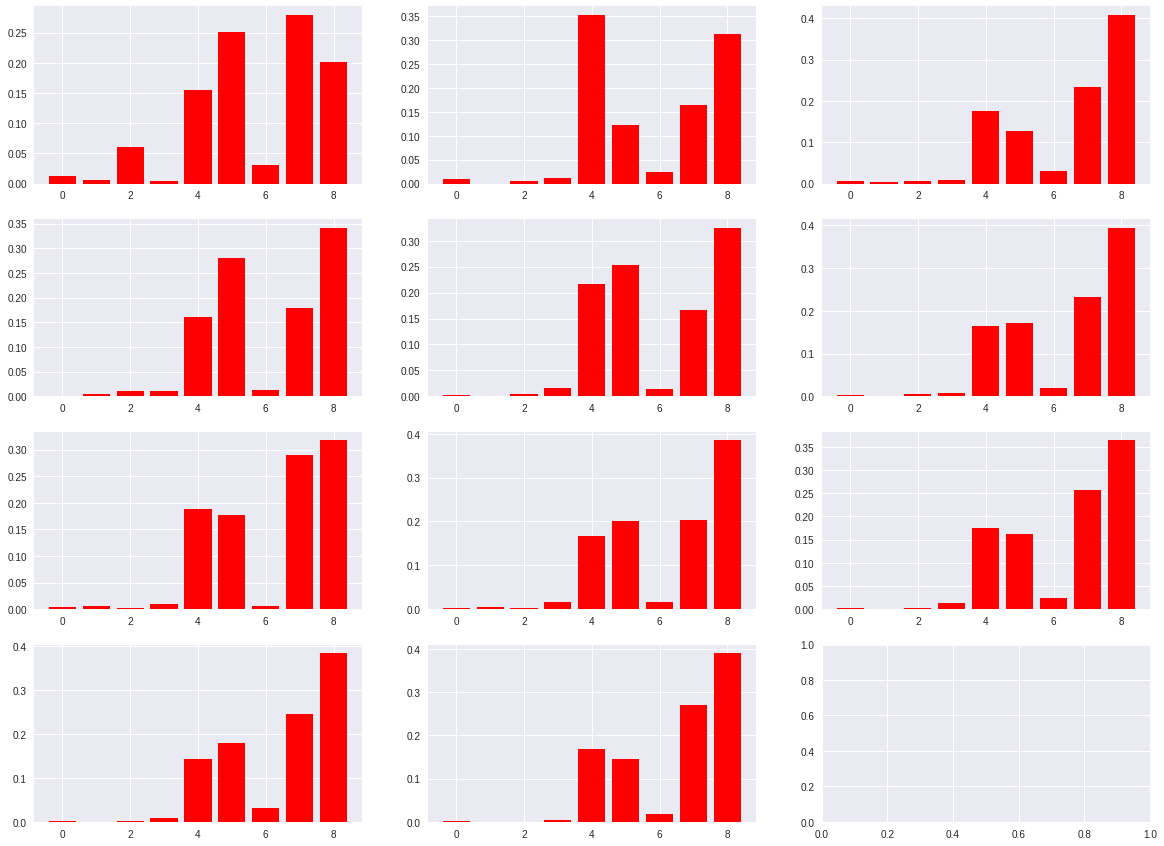

In [28]:
fig, axes = plt.subplots(4, 3, figsize = (20,15))
axes[0, 0].bar(indices[0,:], importances_means[0,:][indices[0,:]], color = "r", align="center")
axes[0, 1].bar(indices[1,:], importances_means[1,:][indices[1,:]], color = "r", align="center")
axes[0, 2].bar(indices[2,:], importances_means[2,:][indices[2,:]], color = "r", align="center")
axes[1, 0].bar(indices[3,:], importances_means[3,:][indices[3,:]], color = "r", align="center")
axes[1, 1].bar(indices[4,:], importances_means[4,:][indices[4,:]], color = "r", align="center")
axes[1, 2].bar(indices[5,:], importances_means[5,:][indices[5,:]], color = "r", align="center")
axes[2, 0].bar(indices[6,:], importances_means[6,:][indices[6,:]], color = "r", align="center")
axes[2, 1].bar(indices[7,:], importances_means[7,:][indices[7,:]], color = "r", align="center")
axes[2, 2].bar(indices[8,:], importances_means[8,:][indices[8,:]], color = "r", align="center")
axes[3, 0].bar(indices[9,:], importances_means[9,:][indices[9,:]], color = "r", align="center")
axes[3, 1].bar(indices[10,:], importances_means[10,:][indices[10,:]], color = "r", align="center")

In [0]:
# Random Forest Training scores
RF_CV_scores

In [0]:
# Random Forest Test scores
RF_scores

# Logistic Regression

### Using standard scalar for features

In [0]:
def scaler(X):
    scaler = preprocessing.StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled

In [0]:
LR_clf = [None] * 11
LR_scores = []
LR_CV_scores = []

# Initialize Coefficients Matrices:
Repub_No_Bachelors = np.zeros((11,100))
Repub_Bachelors = np.zeros((11,100))
# Q2: How do you feel about the job Donald Trump is doing as president?
Democrat_Q2_Disapprove_Strongly = np.zeros((11,100)) 
Democrat_Q2_Approve_Strongly = np.zeros((11,100))

# Split data into train and test set for each sample size and train models.
for i in range(11):
    for j in range(100):
        LR_clf[i] = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        LR_clf[i].fit(scaler(X_ohe_train[i]), y_le_train[i])
        Repub_No_Bachelors[i,j] = LR_clf[i].coef_[2,1]
        Repub_Bachelors[i,j] = LR_clf[i].coef_[2,0]
        Democrat_Q2_Disapprove_Strongly[i,j] = LR_clf[i].coef_[0,22]
        Democrat_Q2_Approve_Strongly[i,j] = LR_clf[i].coef_[0,20]
        #LR_scores.append(LR_clf[i].score(scaler(X_ohe_test[i]), y_le_test[i]))
        #LR_CV_scores.append(np.mean(cross_val_score(LR_clf[i], scaler(X_ohe_train[i]), y_le_train[i], cv =10)))

In [0]:
#LR_CV_scores # L2 logistic regression Training Score

In [0]:
#LR_scores # L2 logistic regression Test Score

Text(0.5,1,'Logistic Regression with L2 Penalty')

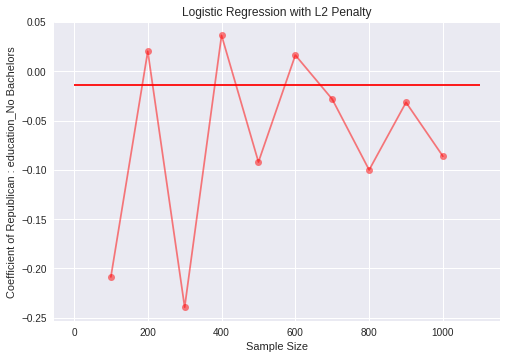

In [58]:
plt.plot(sample_size, np.mean(Repub_No_Bachelors[0:10], axis=1), 'go-', color="r", alpha = 0.5)
plt.hlines(y = np.mean(Repub_No_Bachelors[10]), xmin = 0, xmax = 1100,color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_No Bachelors')
plt.title("Logistic Regression with L2 Penalty")
#matplotlib.axes.Axes.fill_between(sample_size, np.mean(Repub_No_Bachelors[0:10], axis = 1)+2*np.std(Repub_No_Bachelors[0:10], axis = 1),np.mean(Repub_No_Bachelors[0:10], axis = 1)-2*np.std(Repub_No_Bachelors[0:10], axis = 1),where=None, interpolate=False, step=None, data=None)

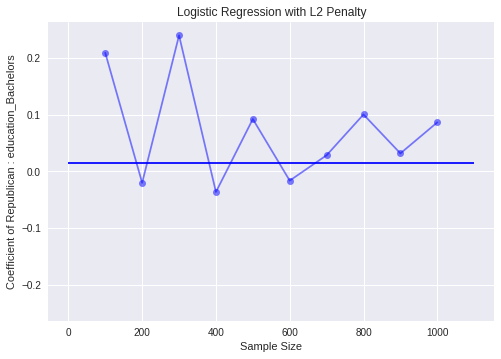

In [59]:
plt.plot(sample_size, np.mean(Repub_Bachelors[0:10], axis = 1), 'go-', color="b", alpha = 0.5)
plt.hlines(y = np.mean(Repub_Bachelors[10]), xmin = 0, xmax = 1100,color='b', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_Bachelors')
plt.title("Logistic Regression with L2 Penalty")
plt.fill_between(sample_size, 
                 np.mean(Repub_No_Bachelors[0:10], axis = 1)+2*np.std(Repub_No_Bachelors[0:10], axis = 1),
                 np.mean(Repub_No_Bachelors[0:10],axis = 1)-2*np.std(Repub_No_Bachelors[0:10],axis = 1), 
                 facecolor = 'b', alpha = 0.1)

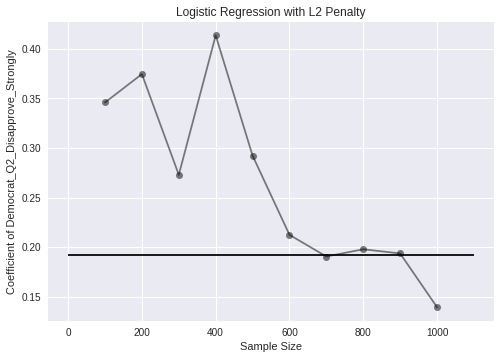

In [60]:
plt.plot(sample_size, np.mean(Democrat_Q2_Disapprove_Strongly[0:10], axis = 1), 'go-', color="k", alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Disapprove_Strongly[10]), xmin = 0, xmax = 1100,color='k', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat_Q2_Disapprove_Strongly')
plt.title("Logistic Regression with L2 Penalty")
plt.fill_between(sample_size, 
                 np.mean(Democrat_Q2_Disapprove_Strongly[0:10], axis = 1)+2*np.std(Democrat_Q2_Disapprove_Strongly[0:10], axis = 1),
                 np.mean(Democrat_Q2_Disapprove_Strongly[0:10],axis = 1)-2*np.std(Democrat_Q2_Disapprove_Strongly[0:10],axis = 1), 
                 facecolor = 'b', alpha = 0.1)

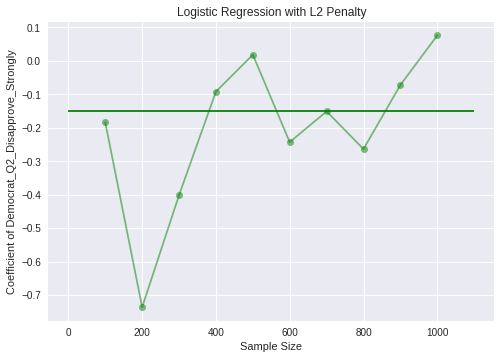

In [61]:
plt.plot(sample_size, np.mean(Democrat_Q2_Approve_Strongly[0:10], axis = 1), 'go-', color="g", alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Approve_Strongly[10]), xmin = 0, xmax = 1100, color='g', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat_Q2_Disapprove_Strongly')
plt.title("Logistic Regression with L2 Penalty")
plt.fill_between(sample_size, 
                 np.mean(Democrat_Q2_Approve_Strongly[0:10], axis = 1)+2*np.std(Democrat_Q2_Approve_Strongly[0:10], axis = 1),
                 np.mean(Democrat_Q2_Approve_Strongly[0:10],axis = 1)-2*np.std(Democrat_Q2_Approve_Strongly[0:10],axis = 1), 
                 facecolor = 'b', alpha = 0.1)

#### Use L1 penalty for Logistic Regression

In [0]:
LR1_clf = [None] * 11
LR1_scores = []
LR1_CV_scores = []

# Initialize Coefficients Matrices:
Repub_No_Bachelors_LR1 = np.zeros((11,100))
Repub_Bachelors_LR1 = np.zeros((11,100))
# Q2: How do you feel about the job Donald Trump is doing as president?
Democrat_Q2_Disapprove_Strongly_LR1 = np.zeros((11,100)) 
Democrat_Q2_Approve_Strongly_LR1 = np.zeros((11,100))

# Split data into train and test set for each sample size and train models.
for i in range(11):
    for j in range(100):
        LR1_clf[i] = LogisticRegression(penalty = 'l1', random_state=0, solver = 'saga',multi_class='multinomial')
        LR1_clf[i].fit(scaler(X_ohe_train[i]), y_le_train[i])
        Repub_No_Bachelors_LR1[i,j] = LR_clf[i].coef_[2,1]
        Repub_Bachelors_LR1[i,j] = LR_clf[i].coef_[2,0]
        Democrat_Q2_Disapprove_Strongly_LR1[i,j] = LR1_clf[i].coef_[0,22]
        Democrat_Q2_Approve_Strongly_LR1[i,j] = LR1_clf[i].coef_[0,20]
        #LR1_scores.append(LR1_clf[i].score(scaler(X_ohe_test[i]), y_le_test[i]))
        #LR1_CV_scores.append(np.mean(cross_val_score(LR1_clf[i], scaler(X_ohe_train[i]), y_le_train[i], cv =10)))    

In [0]:
# Logistic Regression with L2 penalty Training score
#LR1_CV_scores 

In [0]:
# Logistic Regression with L1 penalty Test score
#LR1_scores 

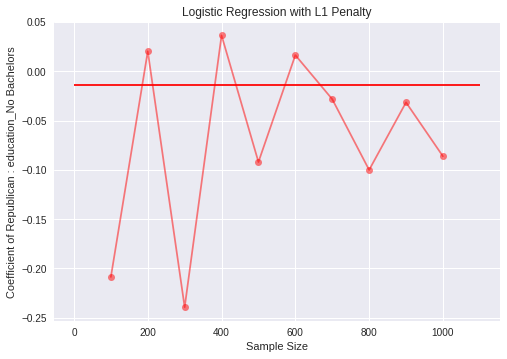

In [65]:
plt.plot(sample_size, np.mean(Repub_No_Bachelors_LR1[0:10], axis=1), 'go-', color="r", alpha = 0.5)
plt.hlines(y = np.mean(Repub_No_Bachelors_LR1[10]), xmin = 0, xmax = 1100,color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_No Bachelors')
plt.title("Logistic Regression with L1 Penalty")
plt.fill_between(sample_size, np.mean(Repub_No_Bachelors_LR1[0:10], axis=1)+2*np.std(Repub_No_Bachelors_LR1[0:10], axis=1),
                 np.mean(Repub_No_Bachelors_LR1[0:10],axis=1)-2*np.std(Repub_No_Bachelors_LR1[0:10], axis=1), facecolor='b', alpha = 0.1)

In [66]:
np.mean(Repub_No_Bachelors_LR1[10])

-0.013952662026768732

Text(0.5,1,'Logistic Regression with L1 Penalty')

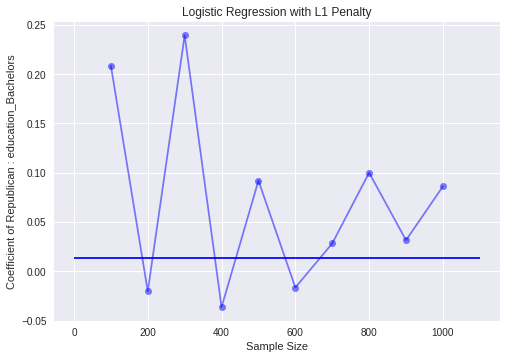

In [67]:
plt.plot(sample_size, np.mean(Repub_Bachelors_LR1[0:10], axis=1), 'go-', color="b", alpha = 0.5)
plt.hlines(y = np.mean(Repub_Bachelors_LR1[10]), xmin = 0, xmax = 1100,color='b', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_Bachelors')
plt.title("Logistic Regression with L1 Penalty")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

Text(0.5,1,'Logistic Regression with L1 Penalty')

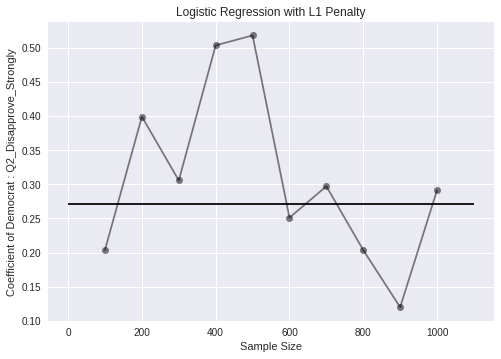

In [68]:
plt.plot(sample_size, np.mean(Democrat_Q2_Disapprove_Strongly_LR1[0:10], axis=1), 'go-', color="k", alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Disapprove_Strongly_LR1[10]), xmin = 0, xmax = 1100,color='k', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat : Q2_Disapprove_Strongly')
plt.title("Logistic Regression with L1 Penalty")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

Text(0.5,1,'Logistic Regression with L1 Penalty')

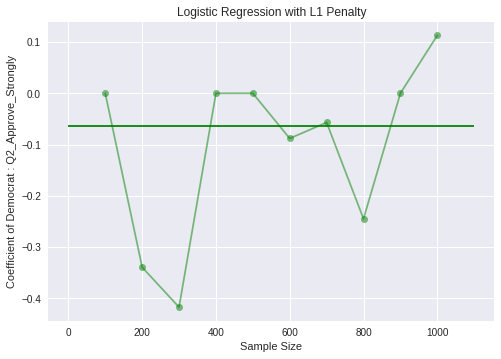

In [69]:
plt.plot(sample_size, np.mean(Democrat_Q2_Approve_Strongly_LR1[0:10], axis=1), 'go-', color="g", alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Approve_Strongly_LR1[10]), xmin = 0, xmax = 1100,color='g', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat : Q2_Approve_Strongly')
plt.title("Logistic Regression with L1 Penalty")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

### SGDClassifier

In [0]:
SGD_clf = [None] * 11
SGD_scores = []
SGD_CV_scores = []

# Initialize Coefficients Matrices:
Repub_No_Bachelors_SGD = np.zeros((11,100))
Repub_Bachelors_SGD = np.zeros((11,100))
# Q2: How do you feel about the job Donald Trump is doing as president?
Democrat_Q2_Disapprove_Strongly_SGD = np.zeros((11,100)) 
Democrat_Q2_Approve_Strongly_SGD = np.zeros((11,100))

# Split data into train and test set for each sample size and train models.
for i in range(11):
    for j in range(100):
        SGD_clf[i] = SGDClassifier(max_iter=1000, tol=1e-3)
        SGD_clf[i].fit(scaler(X_ohe_train[i]), y_le_train[i])
        Repub_No_Bachelors_SGD[i,j] = SGD_clf[i].coef_[2,1]
        Repub_Bachelors_SGD[i,j] = SGD_clf[i].coef_[2,0]
        Democrat_Q2_Disapprove_Strongly_SGD[i,j] = SGD_clf[i].coef_[0,22]
        Democrat_Q2_Approve_Strongly_SGD[i,j] = SGD_clf[i].coef_[0,20]
        #SGD_scores.append(SGD_clf[i].score(scaler(X_ohe_test[i]), y_le_test[i]))
        #SGD_CV_scores.append(np.mean(cross_val_score(LR1_clf[i], scaler(X_ohe_train[i]), y_le_train[i], cv =10)))    

In [0]:
# SGD Classifier Training Score
#SGD_CV_scores

In [0]:
# SGD Classifier Test Score
#SGD_scores

Text(0.5,1,'SGD Classifier')

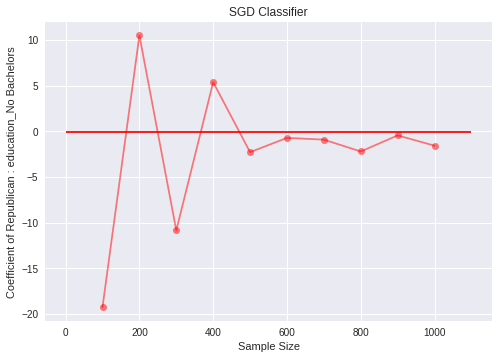

In [73]:
plt.plot(sample_size, np.mean(Repub_No_Bachelors_SGD[0:10], axis=1), 'go-', color="r", alpha = 0.5)
plt.hlines(y = np.mean(Repub_No_Bachelors_SGD[10]), xmin = 0, xmax = 1100,color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_No Bachelors')
plt.title("SGD Classifier")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

Text(0.5,1,'SGD Classifier')

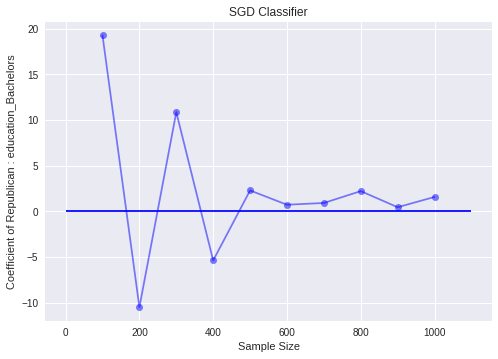

In [74]:
plt.plot(sample_size, np.mean(Repub_Bachelors_SGD[0:10], axis=1), 'go-', color="b", alpha = 0.5)
plt.hlines(y = np.mean(Repub_Bachelors_SGD[10]), xmin = 0, xmax = 1100,color='b', linestyle='-')
#plt.plot(y = np.mean(Repub_Bachelors_SGD[11])    
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Republican : education_Bachelors')
plt.title("SGD Classifier")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

Text(0.5,1,'SGD Classifier')

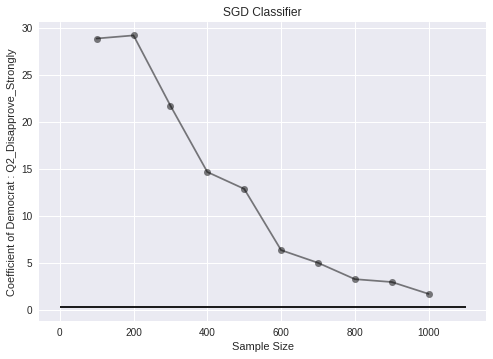

In [75]:
plt.plot(sample_size, np.mean(Democrat_Q2_Disapprove_Strongly_SGD[0:10], axis=1), 'go-', color="k", alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Disapprove_Strongly_SGD[10]), xmin = 0, xmax = 1100,color='k', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat : Q2_Disapprove_Strongly')
plt.title("SGD Classifier")

#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)

Text(0.5,1,'SGD Classifier')

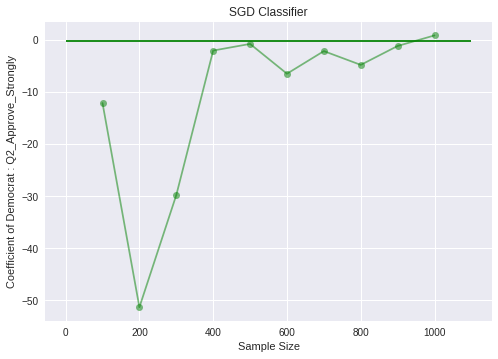

In [76]:
plt.plot(sample_size, np.mean(Democrat_Q2_Approve_Strongly_SGD[0:10], axis=1), 'go-', color="g",alpha = 0.5)
plt.hlines(y = np.mean(Democrat_Q2_Approve_Strongly_SGD[10]), xmin = 0, xmax = 1100,color='g', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Democrat : Q2_Approve_Strongly')
plt.title("SGD Classifier")
#plt.fill_between(sample_size[i], np.mean(Repub_No_Bachelors[i,:])+2*np.std(Repub_No_Bachelors[i,:]),np.mean(Repub_No_Bachelors[i,:])-2*np.std(Repub_No_Bachelors[i,:]), facecolor = 'b', alpha = 0.1)